# Densidad de energía por unidad de frecuencia
$  $

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

A una temperatura 10000 K se registra un máximo de densidad de 7.920226735691003 a una longitud de onda 510.41840306717785
A una temperatura 8000 K se registra un máximo de densidad de 4.055156143315371 a una longitud de onda 638.0396732788797
A una temperatura 5000 K se registra un máximo de densidad de 0.9900283721881942 a una longitud de onda 1020.9034839139857
A una temperatura 3000 K se registra un máximo de densidad de 0.2138461303745567 a una longitud de onda 1701.5502583763962


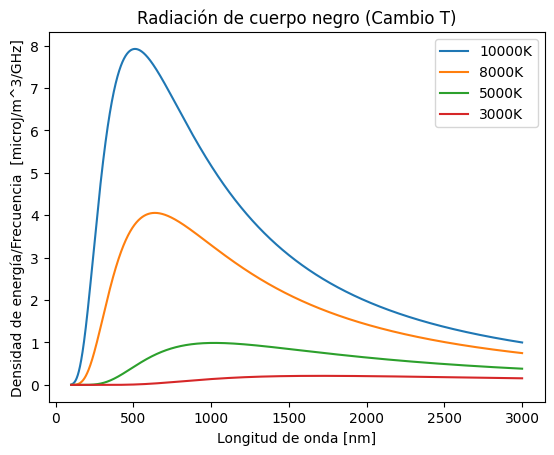

In [8]:

def blackBody(longOnda, T): 
    pi = np.pi
    h = 6.626e-34
    k = 1.38e-23
    c = 3e8
    expTerm = (h*c)/(longOnda*k*T)
    den = (longOnda**3)*((np.e**(expTerm))-1)
    num = (8*pi*h)
    

    return (num/den)


def blackBodyTemperature(T):
    longOnda = np.linspace(100e-9,3000e-9, 6000 )
    density = blackBody(longOnda,T)
    return longOnda, density

def multiplePlots(Tlist): 
    fig, ax = plt.subplots()
  
    listMaxLong = []
    for t in Tlist: 
        long_dens = blackBodyTemperature(t)
        ax.plot(long_dens[0]*1e9,long_dens[1]*(1e9/1e-6))
        #print(long_dens[0], long_dens[1])
        max = 0 
        maxInd = 0 
        i=0
        for e in long_dens[1]: 
            if e > max: 
                max= e
                maxInd = i
            i +=1
        max = max*(1e9/1e-6)
        lambdaM = long_dens[0][maxInd]*1e9
        print(f"A una temperatura {t} K se registra un máximo de densidad de {max} a una longitud de onda {lambdaM}")

    plt.legend(["10000K", "8000K","5000K","3000K"], loc ="upper right")
    plt.title("Radiación de cuerpo negro (Cambio T)")
    plt.xlabel("Longitud de onda [nm]")
    plt.ylabel("Densidad de energía/Frecuencia  [microJ/m^3/GHz]")
    plt.show()

multiplePlots([10000,8000,5000,3000])
    




[99.99999999999041, 99.84005306332106, 99.68036195687723, 99.52092627146628, 99.36174559855012, 99.20281953024404, 99.04414765931581, 98.88572957918447, 98.72756488391941, 98.56965316823933, 98.41199402751116, 98.2545870577489, 98.09743185561292, 97.94052801840859, 97.78387514408536, 97.62747283123582, 97.47132067909453, 97.31541828753718, 97.15976525707929, 97.00436118887546, 96.84920568471819, 96.69429834703689, 96.53963877889687, 96.38522658399836, 96.23106136667546, 96.07714273189507, 95.92347028525596, 95.77004363298775, 95.61686238194991, 95.46392613963062, 95.31123451414601, 95.15878711423889, 95.00658354927795, 94.85462342925668, 94.70290636479234, 94.55143196712501, 94.4001998481166, 94.2492096202498, 94.09846089662713, 93.94795329096998, 93.79768641761751, 93.64765989152582, 93.49787332826679, 93.34832634402723, 93.19901855560786, 93.04994958042226, 92.90111903649601, 92.75252654246559, 92.60417171757749, 92.4560541816872, 92.30817355525824, 92.1605294593612, 92.0131215156726

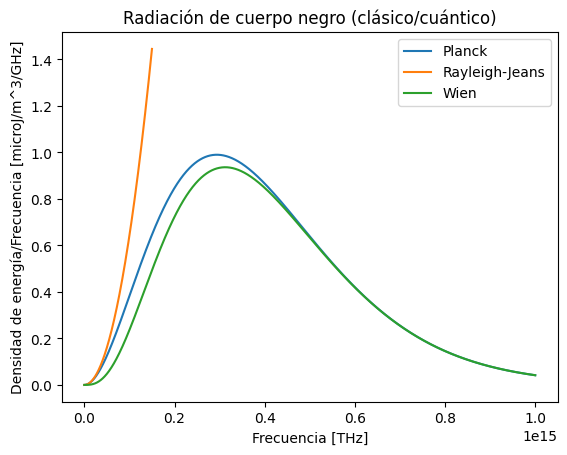

In [9]:
#Take 5000k and compare against Rayleigh-Jeans asnd Wien


def  PlanckFrecuency(frec, T):
    K = 1.38e-23
    h = 6.626e-34
    c  = 3e8
    pi = np.pi

    num = 8*pi*h*frec**3
    expTerm = (h*frec)/(K*T)
    den = ((np.e**expTerm)-1)*c**3
    return num/den


def rayleigh_Jeans(frec, T): 
    K = 1.38e-23
    c  = 3e8
    pi = np.pi
    num = 8*pi*K*frec**2*T
    den = c**3
    return num/den 


def wien(frec,T): 

    K = 1.38e-23
    h = 6.626e-34
    c  = 3e8
    pi = np.pi

    num = 8*pi*h*frec**3
    expTerm = (h*frec)/(K*T)
    den = ((np.e**expTerm))*c**3
    return num/den



#Take 5000k and compare against Rayleigh-Jeans asnd Wien


def  PlanckFrecuency(frec, T):
    K = 1.38e-23
    h = 6.626e-34
    c  = 3e8
    pi = np.pi

    num = 8*pi*h*frec**3
    expTerm = (h*frec)/(K*T)
    den = ((np.e**expTerm)-1)*c**3
    return num/den


def rayleigh_Jeans(frec, T): 
    K = 1.38e-23
    c  = 3e8
    pi = np.pi
    num = 8*pi*K*frec**2*T
    den = c**3
    return num/den 


def wien(frec,T): 

    K = 1.38e-23
    h = 6.626e-34
    c  = 3e8
    pi = np.pi

    num = 8*pi*h*frec**3
    expTerm = (h*frec)/(K*T)
    den = ((np.e**expTerm))*c**3
    return num/den


#La figura ax muestra la densidad
#La figura bx muestra la diferencia porcentual con Planck
def plotComparision(T): 
    fig, ax = plt.subplots()
    #fig, bx = plt.subplots()

    longOnda = np.linspace(10,100e13, 6000)
    planck =PlanckFrecuency(longOnda,T)
    ax.plot(longOnda, planck*(1e9/1e-6))

    longOnda = np.linspace(10,15e13, 6000)
    rayleigh = rayleigh_Jeans(longOnda,T)

    planck =PlanckFrecuency(longOnda,T)
    ax.plot(longOnda, rayleigh*(1e9/1e-6))

    deltaRayleigh = []
    i = 0 
    for e in longOnda: 
        delta = abs(planck[i]-rayleigh[i])
        deltaRayleigh.append((delta/planck[i])*100)

        i+=1
    #bx.plot(longOnda,deltaRayleigh)


    longOnda = np.linspace(10,100e13, 6000)
    wienEquation = wien(longOnda,T)
    planck =PlanckFrecuency(longOnda,T)
    ax.plot(longOnda, wienEquation*(1e9/1e-6))

    deltaWien = []
    i = 0 

    for _ in longOnda: 
        delta = abs(wienEquation[i]-planck[i])
        deltaWien.append((delta/planck[i])*100)
        i+=1
    
    #bx.plot(longOnda,deltaWien)
    
    
    print (deltaWien)
    
    plt.title("Radiación de cuerpo negro (clásico/cuántico)")
    plt.xlabel("Frecuencia [THz]")
    plt.ylabel("Densidad de energía/Frecuencia [microJ/m^3/GHz]")
    plt.legend(["Planck","Rayleigh-Jeans","Wien"], loc ="upper right")
               
    """
    plt.title("Error porcentual respecto a Ecuación de Planck")
    plt.xlabel("Frecuencia [THz]")
    plt.ylabel("Error perocentual (%)")
    plt.legend(["Rayleigh","Wien"], loc ="upper right")

    """
    plt.show()

plotComparision(5000)